<a href="https://colab.research.google.com/github/irffanhaziq/Business-Analytics/blob/main/P138120_Week12_DataAggregation_20231227_WC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 12: Data Aggregation and Group Operation**
Please refer to the textbook: **"Python for Data Analysis"** by Wes McKinney for details of this topic on **Chapter 10**

# **Start by importing NumPy and pandas**

In [23]:
!pip install pandas

In [24]:
!pip install numpy

In [25]:
import numpy as np
import pandas as pd

# **10.1 Group Operations**
## The popular ***split-apply-combine***

In [26]:
# Example DataFrame 1
rng = np.random.default_rng(seed=12345)
df = pd.DataFrame({"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1], dtype="Int64"),
                   "data1" : rng.standard_normal(7),
                   "data2" : rng.standard_normal(7)})
df

,key1,key2,data1,data2
0,a,1,-1.423825,0.648893
1,a,2,1.263728,0.361058
2,None,1,-0.870662,-1.952863
3,b,2,-0.259173,2.347410
4,b,1,-0.075343,0.968497
5,a,<NA>,-0.740885,-0.759387
6,None,1,-1.367793,0.902198


In [36]:
grouped = df['data1']

In [37]:
grouped

0   -1.423825
1    1.263728
2   -0.870662
3   -0.259173
4   -0.075343
5   -0.740885
6   -1.367793
Name: data1, dtype: float64

In [39]:
grouped = df['data1'].groupby(df['key1'])


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
# Compute median
grouped.median()

key1
a   -0.740885
b   -0.167258
Name: data1, dtype: float64

In [41]:
# Compute median without intermediate file
df['data1'].groupby(df['key1']).median()

key1
a   -0.740885
b   -0.167258
Name: data1, dtype: float64

In [42]:
# Another example: passing multiple groupby arrays of keys to find mean
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     1      -1.423825
      2       1.263728
b     1      -0.075343
      2      -0.259173
Name: data1, dtype: float64

In [43]:
# Unstack
means.unstack()

key2,1,2
key1,,
a,-1.423825,1.263728
b,-0.075343,-0.259173


In [ ]:
# Display df content
df

,key1,key2,data1,data2
0,a,1,-1.423825,0.648893
1,a,2,1.263728,0.361058
2,None,1,-0.870662,-1.952863
3,b,2,-0.259173,2.347410
4,b,1,-0.075343,0.968497
5,a,<NA>,-0.740885,-0.759387
6,None,1,-1.367793,0.902198


In [44]:
# Pass column names as the groupby key
# Find mean
df.groupby('key1').mean()

,key2,data1,data2
key1,,,
a,1.5,-0.300327,0.083521
b,1.5,-0.167258,1.657953


In [46]:
# The resulting DataFrame will only include the mean values data1 and data2 that are numeric
# "key1" is not numeric, so it doesn't appear in the output.
df.groupby('key2').mean(numeric_only = True)

,data1,data2
key2,,
1,-0.934406,0.141681
2,0.502278,1.354234


In [47]:
# If we want to include key1
# Pass as a list
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    1    -1.423825  0.648893
     2     1.263728  0.361058
b    1    -0.075343  0.968497
     2    -0.259173  2.347410

### **Iterating over Groups**
***groupby*** supports ***iteration***, generating ***a sequence of 2-tuples***

In [48]:
# Display df content
df

,key1,key2,data1,data2
0,a,1,-1.423825,0.648893
1,a,2,1.263728,0.361058
2,None,1,-0.870662,-1.952863
3,b,2,-0.259173,2.347410
4,b,1,-0.075343,0.968497
5,a,<NA>,-0.740885,-0.759387
6,None,1,-1.367793,0.902198


In [49]:
# Iteration using a for loop
#to access indivual data foe eaach key1
# name -> individual key1 values
# group -> data associated with the 'name'
for name, group in df.groupby('key1'):
    print(name)
    print(group)
    print("\n-------------\n")

a
  key1  key2     data1     data2
0    a     1 -1.423825  0.648893
1    a     2  1.263728  0.361058
5    a  <NA> -0.740885 -0.759387

-------------

b
  key1  key2     data1     data2
3    b     2 -0.259173  2.347410
4    b     1 -0.075343  0.968497

-------------



In [50]:
# Display df content
df

,key1,key2,data1,data2
0,a,1,-1.423825,0.648893
1,a,2,1.263728,0.361058
2,None,1,-0.870662,-1.952863
3,b,2,-0.259173,2.347410
4,b,1,-0.075343,0.968497
5,a,<NA>,-0.740885,-0.759387
6,None,1,-1.367793,0.902198


In [52]:
# In the case of multiple keys
# first element will be a tuple of key values
for (k1,k2), group in df.groupby(['key1','key2']):
    print((k1,k2))
    print(group)
    print("-----------------")

('a', 1)
  key1  key2     data1     data2
0    a     1 -1.423825  0.648893
-----------------
('a', 2)
  key1  key2     data1     data2
1    a     2  1.263728  0.361058
-----------------
('b', 1)
  key1  key2     data1     data2
4    b     1 -0.075343  0.968497
-----------------
('b', 2)
  key1  key2     data1    data2
3    b     2 -0.259173  2.34741
-----------------


In [55]:
# Compute a dictionary using one-liner
pieces = {name:group for name, group in df.groupby('key1')}
pieces

{'a':   key1  key2     data1     data2
 0    a     1 -1.423825  0.648893
 1    a     2  1.263728  0.361058
 5    a  <NA> -0.740885 -0.759387,
 'b':   key1  key2     data1     data2
 3    b     2 -0.259173  2.347410
 4    b     1 -0.075343  0.968497}

In [56]:
# Accessing individual item in dictionary
# Using the "key"
pieces['a']

,key1,key2,data1,data2
0,a,1,-1.423825,0.648893
1,a,2,1.263728,0.361058
5,a,<NA>,-0.740885,-0.759387


### **Grouping with Dictionaries and Series**

In [57]:
# Example DataFrame
# setting the seed number to ensure reproducibility
rng = np.random.default_rng(seed=12345)
people = pd.DataFrame(rng.standard_normal((5, 5)),
                      columns=["a", "b", "c", "d", "e"],
                      index=["Joe", "Steve", "Wanda", "Jill", "Trey"])
people

,a,b,c,d,e
Joe,-1.423825,1.263728,-0.870662,-0.259173,-0.075343
Steve,-0.740885,-1.367793,0.648893,0.361058,-1.952863
Wanda,2.347410,0.968497,-0.759387,0.902198,-0.466953
Jill,-0.060690,0.788844,-1.256668,0.575858,1.398979
Trey,1.322298,-0.299699,0.902919,-1.621583,-0.158189


In [58]:
# Add a few NA values
# Using the explicit indexer -> loc method
people.loc['Wanda', ['b', 'c']] = np.nan
people

,a,b,c,d,e
Joe,-1.423825,1.263728,-0.870662,-0.259173,-0.075343
Steve,-0.740885,-1.367793,0.648893,0.361058,-1.952863
Wanda,2.347410,NaN,NaN,0.902198,-0.466953
Jill,-0.060690,0.788844,-1.256668,0.575858,1.398979
Trey,1.322298,-0.299699,0.902919,-1.621583,-0.158189


In [62]:
# Add a few NA values
# Using the implicit indexer -> iloc method
# (4, 1) -> rows
# (0, 3) -> columns
people.iloc[(4,1),(0,3)] = np.nan #4,1

In [64]:
# Group correspondence for the same columns
# Mapping using a dictionary
mapping = {"a": "red", "b": "red", "c": "blue",
           "d": "blue", "e": "red", "f" : "orange", "g" : "violet"}

In [66]:
# Mapping and compute sum
# Using the people dataset
# Example from the people dataset: "-0.870662 - 0.259173" = -1.129835 (blue)
people.groupby(mapping,axis=1).sum()   ###FINALLLL

,blue,red
Joe,-1.129835,-0.235440
Steve,0.648893,-4.061540
Wanda,0.902198,1.880456
Jill,-0.680811,2.127134
Trey,-0.718663,-0.457888


In [70]:
# Challenge: add the column f and g
# Using the assign() function
rng = np.random.default_rng(seed=12345) ###final
people = people.assign(f=rng.standard_normal((5,1)),
                       g= rng.standard_normal((5,1)))
people

,a,b,c,d,e,f,g
Joe,-1.423825,1.263728,-0.870662,-0.259173,-0.075343,-1.423825,-0.740885
Steve,-0.740885,-1.367793,0.648893,NaN,-1.952863,1.263728,-1.367793
Wanda,2.347410,NaN,NaN,0.902198,-0.466953,-0.870662,0.648893
Jill,-0.060690,0.788844,-1.256668,0.575858,1.398979,-0.259173,0.361058
Trey,NaN,-0.299699,0.902919,-1.621583,-0.158189,-0.075343,-1.952863


In [74]:
	-1.423825+0.259173


-1.1646519999999998

In [72]:
# Mapping and compute sum again
people.groupby(mapping,axis =1).sum()

,blue,orange,red,violet
Joe,-1.129835,-1.423825,-0.235440,-0.740885
Steve,0.648893,1.263728,-4.061540,-1.367793
Wanda,0.902198,-0.870662,1.880456,0.648893
Jill,-0.680811,-0.259173,2.127134,0.361058
Trey,-0.718663,-0.075343,-0.457888,-1.952863


# **10.2 Data Aggregation**

In [75]:
# Display df content from previous example
df

,key1,key2,data1,data2
0,a,1,-1.423825,0.648893
1,a,2,1.263728,0.361058
2,None,1,-0.870662,-1.952863
3,b,2,-0.259173,2.347410
4,b,1,-0.075343,0.968497
5,a,<NA>,-0.740885,-0.759387
6,None,1,-1.367793,0.902198


In [85]:
# Selects the smallest requested number
grouped = df.groupby('key1')
print(grouped.head())
grouped['data1'].nsmallest(2) ## kenapa 2 rows

  key1  key2     data1     data2
0    a     1 -1.423825  0.648893
1    a     2  1.263728  0.361058
3    b     2 -0.259173  2.347410
4    b     1 -0.075343  0.968497
5    a  <NA> -0.740885 -0.759387


key1   
a     0   -1.423825
      5   -0.740885
b     3   -0.259173
      4   -0.075343
Name: data1, dtype: float64

In [82]:
# Define an aggregation functions
# peak_to_peak() function
def peak_to_peak(arr):
    return arr.max()-arr.min()

In [83]:
# agg: aggregate
# apply the function to the dataframe
grouped.agg(peak_to_peak)

,key2,data1,data2
key1,,,
a,1,2.687553,1.408280
b,1,0.183830,1.378913


In [88]:
# Another way using the describe() function
# Generate descriptive statistics.
grouped.describe()

key2                                           data1            ...  \
     count mean       std  min   25%  50%   75%  max count      mean  ...   
key1                                                                  ...   
a      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   3.0 -0.300327  ...   
b      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0 -0.167258  ...   

                         data2                                          \
           75%       max count      mean       std       min       25%   
key1                                                                     
a     0.261422  1.263728   3.0  0.083521  0.744032 -0.759387 -0.199165   
b    -0.121301 -0.075343   2.0  1.657953  0.975039  0.968497  1.313225   

                                    
           50%       75%       max  
key1                                
a     0.361058  0.504975  0.648893  
b     1.657953  2.002681  2.347410  

[2 rows x 24 columns]

In [89]:
# To know more information about the describe() function
grouped.describe?

## **Column-Wise and Multiple Function Application**

In [91]:
# Get the tipping dataset from github
# download here: https://bit.ly/3VyE0vP
tips = pd.read_csv('https://bit.ly/3VyE0vP')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [92]:
# Add additional column
tips['tip_pct']=tips['tip']/tips['total_bill']

In [94]:
# Group the tips by day and smoker
# Create an intermediate object
grouped = tips.groupby(['day','smoker'])

In [95]:
# Get descriptive statistics -> mean on 'tip_pct'
# Using agg() function
grouped_pct = grouped['tip_pct']
grouped_pct.agg(['mean'])

mean
day  smoker          
Fri  No      0.151650
     Yes     0.174783
Sat  No      0.158048
     Yes     0.147906
Sun  No      0.160113
     Yes     0.187250
Thur No      0.160298
     Yes     0.163863

In [96]:
# Passing multiple aggregation functions as a list
grouped_pct.agg(['mean','std',peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [97]:
# Another way of passing aggregation functions
# Give specific columen name
grouped_pct.agg([("AVERAGE",np.mean),('STand_Deviation',np.std)])

AVERAGE  STand_Deviation
day  smoker                           
Fri  No      0.151650         0.028123
     Yes     0.174783         0.051293
Sat  No      0.158048         0.039767
     Yes     0.147906         0.061375
Sun  No      0.160113         0.042347
     Yes     0.187250         0.154134
Thur No      0.160298         0.038774
     Yes     0.163863         0.039389

In [98]:
# Specify a list of functions to apply
funcs = ['count', 'mean', 'max', 'min', 'median']
res = grouped[['tip_pct', 'total_bill']].agg(funcs)
res

tip_pct                                         total_bill  \
              count      mean       max       min    median      count   
day  smoker                                                              
Fri  No           4  0.151650  0.187735  0.120385  0.149241          4   
     Yes         15  0.174783  0.263480  0.103555  0.173913         15   
Sat  No          45  0.158048  0.291990  0.056797  0.150152         45   
     Yes         42  0.147906  0.325733  0.035638  0.153624         42   
Sun  No          57  0.160113  0.252672  0.059447  0.161665         57   
     Yes         19  0.187250  0.710345  0.065660  0.138122         19   
Thur No          45  0.160298  0.266312  0.072961  0.153492         45   
     Yes         17  0.163863  0.241255  0.090014  0.153846         17   

                                              
                  mean    max    min  median  
day  smoker                                   
Fri  No      18.420000  22.75  12.46  19.235  
     Yes     16.813333  40.17   5.75  13.420  
Sat  No      19.661778  48.33   7.25  17.820  
     Yes     21.276667  50.81   3.07  20.390  
Sun  No      20.506667  48.17   8.77  18.430  
     Yes     24.120000  45.35   7.25  23.100  
Thur No      17.113111  41.19   7.51  15.950  
     Yes     19.190588  43.11  10.34  16.470

In [99]:
# Accessing individual data from aggregation result
res['total_bill']

count       mean    max    min  median
day  smoker                                        
Fri  No          4  18.420000  22.75  12.46  19.235
     Yes        15  16.813333  40.17   5.75  13.420
Sat  No         45  19.661778  48.33   7.25  17.820
     Yes        42  21.276667  50.81   3.07  20.390
Sun  No         57  20.506667  48.17   8.77  18.430
     Yes        19  24.120000  45.35   7.25  23.100
Thur No         45  17.113111  41.19   7.51  15.950
     Yes        17  19.190588  43.11  10.34  16.470

In [100]:
# Can pass aggreation functions as a list of tuples
ftuples = [("Average", 'mean'),('Variance', np.var)]
grouped[['tip_pct', 'total_bill']].agg(ftuples)

tip_pct           total_bill            
              Average  Variance    Average    Variance
day  smoker                                           
Fri  No      0.151650  0.000791  18.420000   25.596333
     Yes     0.174783  0.002631  16.813333   82.562438
Sat  No      0.158048  0.001581  19.661778   79.908965
     Yes     0.147906  0.003767  21.276667  101.387535
Sun  No      0.160113  0.001793  20.506667   66.099980
     Yes     0.187250  0.023757  24.120000  109.046044
Thur No      0.160298  0.001503  17.113111   59.625081
     Yes     0.163863  0.001551  19.190588   69.808518

In [101]:
# Applying different functions using a dictionary
grouped.agg({'tip':np.max, 'size':'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [103]:
# Another way: Passing aggreation functions as dictionary -> as key-values pair
grouped.agg({'total_bill': ['min','max','mean','std']},size = 'sum')

total_bill                             
                   min    max       mean        std
day  smoker                                        
Fri  No          12.46  22.75  18.420000   5.059282
     Yes          5.75  40.17  16.813333   9.086388
Sat  No           7.25  48.33  19.661778   8.939181
     Yes          3.07  50.81  21.276667  10.069138
Sun  No           8.77  48.17  20.506667   8.130189
     Yes          7.25  45.35  24.120000  10.442511
Thur No           7.51  41.19  17.113111   7.721728
     Yes         10.34  43.11  19.190588   8.355149

## **Returning Aggregated Data Without Row Indexes**

In [106]:
# Disable the index
# Need to pass "numeric_only = True" to mean() as it involves non-numeric data
tips.groupby(['day','smoker'],as_index = True).mean()

<ipython-input-106-aeaa806c2325>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['day','smoker'],as_index = True).mean()


total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

# **10.3 Apply: General split-apply-combine**

In [107]:
# Define a function called 'top'
# select the top five tip_pct values by group
def  top (df, n=5, column ='tip_pct'):
    return df.sort_values(column,ascending=False)[:n]

In [108]:
# Display tips content
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [110]:
# Apply the function
# Return top six
# why?
#new aggrument will overright th defult value in the function
top(tips,n=6)  # change the defult value.


,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525


In [111]:
# groupby smoker
# return top 5 for each column
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     232       11.61  3.39     No   Sat  Dinner     2  0.291990
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       88        24.71  5.85     No  Thur   Lunch     2  0.236746
Yes    172        7.25  5.15    Yes   Sun  Dinner     2  0.710345
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       109       14.31  4.00    Yes   Sat  Dinner     2  0.279525

In [113]:
# Pass additional argument after the function
# Overwrite the default values
tips.groupby(['smoker','day']).apply(top,n=3,column ='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
            91        22.49   3.50     No   Fri  Dinner     2  0.155625
            223       15.98   3.00     No   Fri   Lunch     3  0.187735
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
            59        48.27   6.73     No   Sat  Dinner     4  0.139424
            23        39.42   7.58     No   Sat  Dinner     4  0.192288
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
            112       38.07   4.00     No   Sun  Dinner     3  0.105070
            11        35.26   5.00     No   Sun  Dinner     4  0.141804
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
            85        34.83   5.17     No  Thur   Lunch     4  0.148435
            141       34.30   6.70     No  Thur   Lunch     6  0.195335
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
            90        28.97   3.00    Yes   Fri  Dinner     2  0.103555
            96        27.28   4.00    Yes   Fri  Dinner     2  0.146628
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
            102       44.30   2.50    Yes   Sat  Dinner     3  0.056433
            207       38.73   3.00    Yes   Sat  Dinner     4  0.077459
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
            184       40.55   3.00    Yes   Sun  Dinner     2  0.073983
            180       34.65   3.68    Yes   Sun  Dinner     4  0.106205
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982
            83        32.68   5.00    Yes  Thur   Lunch     2  0.152999
            192       28.44   2.56    Yes  Thur   Lunch     2  0.090014

In [115]:
# Using describe() function to get descriptive statistics
#wide table format
res = tips.groupby('smoker')['tip_pct'].describe()

In [117]:
res

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [116]:
# Unstack
# Transform table from wide to long format
res.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

## **Suppressing the Group Keys**

In [118]:
# Suppressing group key -> group_keys function
tips.groupby('smoker',group_keys= False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
232,11.61,3.39,No,Sat,Dinner,2,0.291990
149,7.51,2.00,No,Thur,Lunch,2,0.266312
51,10.29,2.60,No,Sun,Dinner,2,0.252672
185,20.69,5.00,No,Sun,Dinner,5,0.241663
88,24.71,5.85,No,Thur,Lunch,2,0.236746
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525


## **Quantile and Bucket Analysis**

In [120]:
# Example dataset
rng = np.random.default_rng(seed=12345)
frame = pd.DataFrame({"data1": rng.standard_normal(1000),
                      "data2": rng.standard_normal(1000)})
frame.head()

,data1,data2
0,-1.423825,-1.176622
1,1.263728,1.205009
2,-0.870662,0.717879
3,-0.259173,-2.686273
4,-0.075343,-1.865260


In [122]:
# Using the cut() function to transform into categorical data
quartiles = pd.cut(frame['data1'],4)

quartiles.head

<bound method NDFrame.head of 0      (-1.537, 0.0459]
1       (0.0459, 1.629]
2      (-1.537, 0.0459]
3      (-1.537, 0.0459]
4      (-1.537, 0.0459]
             ...       
995     (0.0459, 1.629]
996     (0.0459, 1.629]
997    (-1.537, 0.0459]
998     (0.0459, 1.629]
999    (-1.537, 0.0459]
Name: data1, Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(-3.126, -1.537] < (-1.537, 0.0459] < (0.0459, 1.629] <
                                           (1.629, 3.211]]>

In [123]:
# Define a function -> get_stats
def get_stats(group):
    return pd.DataFrame(
        {'min': group.min(),'max':group.max(),
         'count':group.count(),'mean':group.mean()}
    )

In [124]:
# Intermediate file
#quartiles -> four catogrical
grouped = frame.groupby(quartiles)

In [125]:
# Apply the get_stats function
grouped.apply(get_stats)

min       max  count      mean
data1                                                      
(-3.126, -1.537] data1 -3.119609 -1.538154     65 -2.019675
                 data2 -2.433466  2.040796     65  0.033381
(-1.537, 0.0459] data1 -1.523449  0.045684    443 -0.605092
                 data2 -2.830704  3.721098    443  0.020211
(0.0459, 1.629]  data1  0.048765  1.621952    438  0.678524
                 data2 -2.320815  3.461976    438  0.029518
(1.629, 3.211]   data1  1.651471  3.211418     54  2.044438
                 data2 -1.778229  2.530599     54  0.228316

In [127]:
# Using python internal function
grouped.agg(['min','max','count','mean'])

data1                               data2            \
                       min       max count      mean       min       max   
data1                                                                      
(-3.126, -1.537] -3.119609 -1.538154    65 -2.019675 -2.433466  2.040796   
(-1.537, 0.0459] -1.523449  0.045684   443 -0.605092 -2.830704  3.721098   
(0.0459, 1.629]   0.048765  1.621952   438  0.678524 -2.320815  3.461976   
(1.629, 3.211]    1.651471  3.211418    54  2.044438 -1.778229  2.530599   

                                  
                 count      mean  
data1                             
(-3.126, -1.537]    65  0.033381  
(-1.537, 0.0459]   443  0.020211  
(0.0459, 1.629]    438  0.029518  
(1.629, 3.211]      54  0.228316

In [128]:
# Display top few rows of frame
frame.head()

,data1,data2
0,-1.423825,-1.176622
1,1.263728,1.205009
2,-0.870662,0.717879
3,-0.259173,-2.686273
4,-0.075343,-1.865260


In [129]:
# Assign each data into respective bin
# Dividing data1 into 4 bins based on their quantiles
quartiles_samp = pd.cut(frame['data1'],4)

In [131]:
# Apply get_stats function
# quartiles_samp -> divide data1 into 4 bins based on their quantiles
# get_stats -> min, max, count & mean
grouped = frame.groupby(quartiles_samp)
grouped.apply(get_stats)

min       max  count      mean
data1                                                      
(-3.126, -1.537] data1 -3.119609 -1.538154     65 -2.019675
                 data2 -2.433466  2.040796     65  0.033381
(-1.537, 0.0459] data1 -1.523449  0.045684    443 -0.605092
                 data2 -2.830704  3.721098    443  0.020211
(0.0459, 1.629]  data1  0.048765  1.621952    438  0.678524
                 data2 -2.320815  3.461976    438  0.029518
(1.629, 3.211]   data1  1.651471  3.211418     54  2.044438
                 data2 -1.778229  2.530599     54  0.228316

## **Filling Missing Values with Group-Specific Values**

In [132]:
# Example data
rng = np.random.default_rng(12345)
s = pd.Series(rng.standard_normal(6))
s

0   -1.423825
1    1.263728
2   -0.870662
3   -0.259173
4   -0.075343
5   -0.740885
dtype: float64

In [133]:
# Introduce NaN: skip of two
s[::2]=np.nan
s

0         NaN
1    1.263728
2         NaN
3   -0.259173
4         NaN
5   -0.740885
dtype: float64

In [135]:
# Fill NA with mean
#compute will mean
s.mean()
s.fillna(s.mean())

0    0.087890
1    1.263728
2    0.087890
3   -0.259173
4    0.087890
5   -0.740885
dtype: float64

In [136]:
# Another data
states = ["Ohio", "New York", "Vermont", "Florida",
          "Oregon", "Nevada", "California", "Idaho"]
group_key = ["East", "East", "East", "East",
             "West", "West", "West", "West"]
data = pd.Series(rng.standard_normal(8), index=states)
data

Ohio         -1.367793
New York      0.648893
Vermont       0.361058
Florida      -1.952863
Oregon        2.347410
Nevada        0.968497
California   -0.759387
Idaho         0.902198
dtype: float64

In [137]:
# Data wrangling
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio         -1.367793
New York      0.648893
Vermont            NaN
Florida      -1.952863
Oregon        2.347410
Nevada             NaN
California   -0.759387
Idaho              NaN
dtype: float64

In [138]:
# Size of the group key
data.groupby(group_key).size()

East    4
West    4
dtype: int64

In [ ]:
# Display data content
data

Ohio         -1.020327
New York     -1.609053
Vermont       0.340329
Florida      -1.271959
Oregon       -0.257528
Nevada       -0.131733
California   -0.857751
Idaho         0.737082
dtype: float64

In [139]:
# count of group key
# Nan is not counted
data.groupby(group_key).count()

East    3
West    2
dtype: int64

In [140]:
# Mean
# Based on group_key -> East and West
data.groupby(group_key).mean()

East   -0.890588
West    0.794011
dtype: float64

In [141]:
# Define a custom function -> fill_mean
def fill_mean(group):
    return group.fillna(group.mean())

In [142]:
# Display content of data
data

Ohio         -1.367793
New York      0.648893
Vermont            NaN
Florida      -1.952863
Oregon        2.347410
Nevada             NaN
California   -0.759387
Idaho              NaN
dtype: float64

In [143]:
# Fill the NA values using the group means
data.groupby(group_key).apply(fill_mean)

<ipython-input-143-bfc8302ad6c1>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data.groupby(group_key).apply(fill_mean)


Ohio         -1.367793
New York      0.648893
Vermont      -0.890588
Florida      -1.952863
Oregon        2.347410
Nevada        0.794011
California   -0.759387
Idaho         0.794011
dtype: float64

# **Group Weighted Average and Correlation**

In [144]:
# An example data
rng = np.random.RandomState(12345)
df = pd.DataFrame({"category": ["a", "a", "a", "a",
                                "b", "b", "b", "b"],
                   "data": rng.standard_normal(8),
                   "weights": rng.uniform(size=8)})
df

,category,data,weights
0,a,-0.204708,0.748907
1,a,0.478943,0.653570
2,a,-0.519439,0.747715
3,a,-0.555730,0.961307
4,b,1.965781,0.008388
5,b,1.393406,0.106444
6,b,0.092908,0.298704
7,b,0.281746,0.656411


In [148]:
# Intermediate variable groupby category
grouped = df.groupby('category')

# Define a weighted average function -> get_wavg
def get_wavg(group):
    return np.average(group['data'],weights = group['weights'])

In [149]:
# Apply get_wavg function
grouped.apply(get_wavg)

category
a   -0.245188
b    0.352824
dtype: float64

#Display conecnt of df

In [151]:
df

,category,data,weights
0,a,-0.204708,0.748907
1,a,0.478943,0.653570
2,a,-0.519439,0.747715
3,a,-0.555730,0.961307
4,b,1.965781,0.008388
5,b,1.393406,0.106444
6,b,0.092908,0.298704
7,b,0.281746,0.656411


# **Weighted Mean Formula**:

* find the ***sum of all the variables multiplied by their weight***, then ***divide by the sum of the weights***.

* For more information about Weighted mean, visit this website: http://tinyurl.com/4d4nr7fh

In [ ]:
# Calculate weight mean manually
(-0.204708*0.748907 + 0.478943*0.653570 + (-0.519439* 0.747715) + (-0.555730*0.961307)) / (0.748907+ 0.653570 + 0.747715 + 0.961307)

-0.24518855658992655

In [153]:
# Another example
# download the stock_px.csv here: https://bit.ly/3vuuejJ
# end-of-day prices for a Apple, Microsoft, ExxonMobil and the S&P 500 index
# parse_dates=True -> parse any columns that look like dates into datetime objects
# index_col=0 -> specifies which column from the CSV file should be used as the index
close_px = pd.read_csv('https://bit.ly/3vuuejJ',
                       parse_dates=True,
                       index_col=0)

In [155]:
# Display top few rows
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [156]:
# Define a custom spx_corr function
# pair-wise correlation of each column with the "SPX" column
def spx_corr(group):
    return group.corrwith(group['SPX'])

In [159]:
# Percentage change between the current and a prior element
rets = close_px.pct_change().dropna()
rets

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [160]:
# Define a custom get_year function
# group by year
def get_year(x):
    return x.year

In [162]:
# Group by year
by_year = rets.groupby(get_year)
by_year.head()

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
2004-01-02,-0.004677,0.002765,-0.008929,-0.003094
2004-01-05,0.042293,0.025276,0.023249,0.012395
2004-01-06,-0.003607,0.003586,-0.006816,0.001292
2004-01-07,0.022624,-0.001340,-0.007149,0.002367
2004-01-08,0.033628,-0.001342,-0.002592,0.004963


In [163]:
# Apply function
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [166]:
# Define a custom corr_aapl_msft function
# compute inter-column correlations
def corr_aapl_msft(group):
    return group['AAPL'].corr(group['MSFT'])

In [168]:
# Annual correlation between Apple and Microsoft
by_year.apply(corr_aapl_msft)

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

# **Group-Wise Linear Regression**

In [169]:
# Mmporting the statsmodels library
import statsmodels.api as sm

In [170]:
# Define a custom ordinary least squares (OLS) regression function
def regress(data, yvar=None, xvars=None):
    Y = data[yvar]
    X = data[xvars]
    X["intercept"] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [174]:
# Yearly linear regression of AAPL on SPX returns
by_year.apply(regress, yvar='AAPL',xvars=['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


# **10.4 Group Transforms and “Unwrapped” GroupBys**

In [175]:
# An example
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                   'value': np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [176]:
# group means by key
g =df.groupby('key')['value'] # create intermedite file
g.mean() #compute mean

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [177]:
# Define a custom normalization function
def normalise(x):
    return (x-x.mean())/x.std()

In [178]:
# method 1 - slower (user-defined function, preseumably not optimised)
g.transform(normalise)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [179]:
# method 2 - slower (user-defined function, preseumably not optimised)
g.apply(normalise)

<ipython-input-179-357b78bed33a>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  g.apply(normalise)


0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [180]:
# faster - using default python function
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [182]:
# unwrapped group operations - doing arithmetic between the outputs of
# multiple GroupBy operations
# often much faster than a general apply function
%timeit (df['value']-g.transform('mean'))/g.transform('std')

950 µs ± 248 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# **Transform vs Apply**

* The ***transform*** method is generally ***more efficient than apply*** when we are performing a simple element-wise operation on each group
* The ***apply method*** is ***more flexible but can be slower than transform*** for certain operations.
    * apply method allows more complex operations, and the function passed to apply can return a scalar, a Series, or a DataFrame.
* if the operation is simple, ***transform is often faster***.

# **10.5 Pivot Tables and Cross-Tabulation**
A ***pivot table*** is a ***data summarization*** tool

In [ ]:
# From previous tipping dataset
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [ ]:
# pivot table - getting mean for each column


<ipython-input-285-2dd6ed6160fa>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  tips.pivot_table(index=["day", "smoker"])


size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [ ]:
# Another example - getting mean for size and tip_pct columns
# Complex but very useful


size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

## **Cross-Tabulations: Crosstab**
A ***special pivot table*** to compute ***group frequencies***

In [ ]:
# Import a specific class or object called StringIO from the io module
# allows us to read from or write to strings as if they were files
from io import StringIO

In [ ]:
# data consists of strings
data = """Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""

In [ ]:
# Create a table
# sep="\s+" -> indicates that one or more whitespace characters are used as the separator between columns
data = pd.read_table(StringIO(data), sep="\s+")
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [ ]:
# Crosstab example 1 - find group frequencies
# summarize by nationality and handedness


Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [ ]:
# tipping dataset
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [ ]:
# Crosstab example 2


smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

# ***That's all...See you all next year!!!***

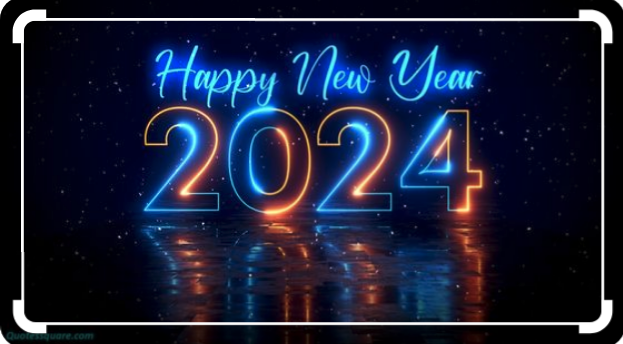